## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#finding the number of rows in the dataset
print(df.shape)

(294478, 5)


There are a total of 294478 rows in the dataset

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == True')['user_id'].count()/len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group == "control"').query('landing_page == "new_page"')['user_id'].count() + df.query('group == "treatment"').query('landing_page == "old_page"')['user_id'].count()

3893

f. Do any of the rows have missing values?

There are no missing values as shown by the code below



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page therefore we should only use the rows that we can feel confident in the accuracy of the data



Filtering out mismatch rows and storing the alligned rows in df2


In [8]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Checking to confirm that the filtering operation worked correctly



In [9]:
df2.shape[0]

290585

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

There are a total of 290584 unique users as shown by the code below


In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The user_id 773192 was repeated

c. What is the row information for the repeat **user_id**? 

In [13]:
# the row information for the repeat user_id
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# using pandas drop_duplicates function to remove one of the repeated user_id  
df2.drop_duplicates(subset ="user_id", 
                     keep = 'first', inplace = True)

C:\Users\Max\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# verifying to ensure that one of the duplicated user_id has been removed 
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# the probability of an individual converting regardless of the page they receive is the same as the proportion of users converted
probability_of_converting = df.query('converted == True')['user_id'].count()/len(df)
probability_of_converting

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# proportion of individual in the `control` group that converted
(df2.query('group =="control"')['converted'] == True).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# proportion of individual in the `treatment` group that converted
(df2.query('group =="treatment"')['converted'] == True).mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#proportion of individual who  received the new page
len(df2[df2['landing_page']=='new_page'])/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

Given that the probability of conversion regardless of page is 0.1196 we may not be able to conclude or justify any conclusions on this seeing that a control experiment has not yet kicked in at this point.
However, by comparing the probability of an individual in the control group being converted to that of an individual in the treatment group you would notice that the new page doesn’t seem to be of any significance with a probability of 0.1188 as opposed to that of the control group which is 0.1204 approximately.  This is even more glaring considering the fact that the probability that an individual received the new page is 0.5001 approximately, implying that both pages have almost the same number of random viewers thus giving both pages equal opportunities of conversions.




<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

 Null hpothesis: Pnew (the new page) is the same as Pold (the old page) or less better than Pold (the old page) 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [20]:
df3 = pd.read_csv('ab_data.csv')
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df3.shape[0]

294478

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
convert_rate_pnew = df2['converted'].mean()
print(convert_rate_pnew)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

Our null hypothesis assumes that there is no significant difference in performance in favor of the new site. That's why we are asked to assume the same conversion rate for p_new and p_old:
Furthermore, we assume they are equal to the converted rate in ab_data.csv regardless of the page
That means that conversion rate for 𝑝𝑛𝑒𝑤 and for 𝑝𝑜𝑙𝑑 under the null is the same as the conversion rate for the entire dataset:


In [23]:
convert_rate_pold = convert_rate_pnew
print(convert_rate_pold)

0.11959708724499628


c. What is $n_{new}$?

In [24]:
# nnew is the number of new_page that converted
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
print(n_new)

145310


d. What is $n_{old}$?

In [25]:
# nold is the number of old_page that converted
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
p=0.1196
new_page_converted = np.random.choice([0,1], size=145310, replace=True, p=[1-p, p])
print(new_page_converted.mean())

0.1203702429289106


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0,1], size=145274, replace=True, p=[1-p, p])
print(old_page_converted.mean())

0.11788069441193882


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
obs_diff =new_page_converted.mean() - old_page_converted.mean()
print(obs_diff)

0.002489548516971779


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

We will be comparing the conclusions drawn from our sample size to that of the simulated value, it’s therefore necessary to get the values of the appropriate statistics from our sample corresponding to the population parameters in this case the average conversion rate of each of the pages under considerations as well as their average differences



In [29]:
convert_new = df2.query('landing_page=="new_page"')['converted'].value_counts()[1]
convert_old = df2.query('landing_page=="old_page"')['converted'].value_counts()[1]
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
prop_new_page_converted =convert_new/len(df2)
prop_old_page_converted = convert_old/len(df2)
obser_diffs = prop_new_page_converted - prop_old_page_converted
print(prop_new_page_converted)
print(prop_old_page_converted)
print(obser_diffs)
print(n_new)
print(n_old)

0.05941139223081794
0.06018569501417834
-0.0007743027833604019
145310
145274


In [30]:
p_diffs = []
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)
p_diffs = np.array(p_diffs)
(p_diffs > obser_diffs).mean()

0.9969

In [31]:
print(p_diffs.mean())

0.0024864193318961704


In [32]:
(p_diffs > obser_diffs).mean()

0.9969

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

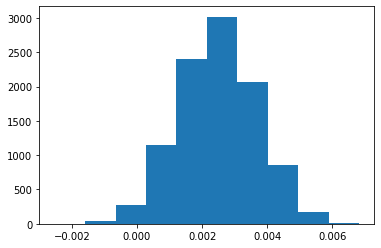

In [33]:

plt.hist(p_diffs);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
(p_diffs > obser_diffs).mean()

0.9969

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

This is the probability of obtaining your observed statistics from the sampling distribution of the null 

The value is called p-value

The rule states that if our p-value is less than the type 1 error rate then professionals say we reject the null. That is, we choose the alternative; therefore given a type 1 error rate of 5% and a p-value of 0.985 which is significantly larger than our type 1 error rate of 5% we favor the null

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

In [36]:
convert_new = df2.query('landing_page=="new_page"')['converted'].value_counts()[1]
convert_old = df2.query('landing_page=="old_page"')['converted'].value_counts()[1]
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
prop_new_page_converted =convert_new/len(df2)
prop_old_page_converted = convert_old/len(df2)
obser_diffs = prop_new_page_converted - prop_old_page_converted


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [38]:
print(z_test)
print(p_value)

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

In [39]:
# tells us what our critical value at 95% confidence is
from scipy.stats import norm 


In [40]:
norm.ppf(1-(0.05/2)) 

1.959963984540054

•	The z-score measures the number of standard deviations away from the mean. Both z-scores and p-values are associated with the standard normal distribution. Extreme (very high or very low) z-scores with very small p-values are found in the tail of the normal distribution, indicating the observed statistics are unlikely from the null and thus we should reject the null. 

•	In order to check the significance of z-score, one would need to compare the critical z-score with z-score gotten at 95% confidence level, the values are -1.96 and +1.96 standard deviations as shown above. If the z-score computed above falls into (-1.96, +1.96), you would fail to reject the null hypothesis.


•	On the other hand, a p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we fail to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

This would be a lojistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2.head() 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [43]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df = df.drop('group', axis=1)

C:\Users\Max\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Max\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results =model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:22:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

the p-value associated with ab_page is 0.190

•	The p-value associated with ab_page in the regression model is 0.190. 
•	In regression , P-value is given for testing if the intercept or slope is equal to zero in the null hypothesis like this for the null and  alternative hypothesis respectively:
•	H0:pnew−pold=0
•	H1:pnew−pold≠0

•	So this is "equal or not" rather than "larger or not"as we did for part II, moreover this part of the analysis is a two-sided t-test compared to a one-sided t-test in part II, and the hypotheses are valid for all regressions.

•	The null hypothesis of part II assumes the following:
•	H0:pnew−pold≤0
•	H1:pnew−pold>0

•	Here I am performing a one-sided t-test with different approaches, as an additional info: when you do not specify your alternative in stats.proportions_ztest, as a default a two-sided test would be performed, which would result in the same outcome as in part III regression analysis.

•	The rule states that if the P-value is less than the type 1 error rate of 5% (given) we reject the null.
•	In the case of regression our p-value for the intercept is zero which provides sufficient evidence that the baseline has statistical significance in predicting the conversion rate.

•	The p-value for the slope in the regression model under the null hypothesis assumes that the new page has no correlation with the response variable, however, comparing the p-value of 0.190 (19%) for the ab_page under the null in the regression model with a type one error rate of 5%, it is enough evidence that we favor the null.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

•	Why I think it is a good idea to consider other factors in the regression model is to enhance the value of R-squared. When other independent variables, that have linear relationships with the response are integrated into the model thus increasing the amount of the response variable that can be explained by the explanatory variable. This has the effect of raising the value of the R-squared while reducing the amount of the standard error (due to the wide spread out of the standard deviation). However, if the additional factors integrated into the model happens to be in a liner relationship with one another this could result into flipped coefficient and the result will be unreliable.

•	Based on the p-value for ab_page, we do not have statistical evidence to suggest a significant relationship between conversion and landing page, so it is worth exploring whether other variables (Timestamp, age, gender, location, etc...) may influence the conversion instead.

•	The disadvantage of adding additional terms into a regression model is collinearity. We want our predictor (X) variables to correlate with our response (y) variable (have a linear relationship), but when we add more predictor variables they might end up correlating with each other. We can use sb.pairplot to compare x variables, and VIF(variance inflation factors) to remove the least important variable if two variables are strongly related (VIF > 10).

•	Also, when (X) variables are not linearly related, higher order terms (such as interactions, quadratics, and cubics) might be considered. For example, if the slopes of two x variables are not parallel, this indicates that an interaction between those two variables is likely present. In this case, we can create a new column that multiplies these two values and review this added interaction with the predictor (y) variable.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [48]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
### Create the necessary dummy variables
df_new['intercept'] = 1
dum_2 = pd.get_dummies(df_new['country'])

In [51]:
df_new = pd.merge(left=df_new, right = dum_2,
                    left_on ='user_id',  right_on = 'user_id', how ='inner')

In [52]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [53]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA','UK']])
results =model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:26:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [56]:
print(results.conf_int())

                  0         1
intercept -2.006696 -1.971847
ab_page   -0.037354  0.007467
CA        -0.093447  0.011933
UK        -0.016176  0.035943


The results above show that we are very confident of a user converting if the user is from the US therefore we would not favor the null, that is, we favor the alternative. On the other hand, a p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis, this means we fail to reject the null.

odds ratio
I'll take the exponential of each of the coefficients to generate the odds ratios. This tells me how a 1 unit increase or decrease in a variable affects the odds of being converted.

In [57]:
print(np.exp(results.params))

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64


As can be seen from the result of how uncertainty a variable can impact the converssion rate, shows that users from the US has the least uncertainty from being converted (that is , more likely to convert) while users from the UK are the most unlikely to convert.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
df_new['ab_page CA'] = df_new['ab_page']*df_new['CA']
df_new['ab_page UK'] = df_new['ab_page']*df_new['UK']

In [59]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA','UK','ab_page CA','ab_page UK']])
results =model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        18:51:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

The p-values from the above result with the exception of the baseline (intercept) are all indicatives that we favor the null. the R-squred value of zero further drives home a week relationship between explanatory variables and the response 

In [61]:
print(results.conf_int())

                   0         1
intercept  -2.005346 -1.967609
ab_page    -0.047340  0.006213
CA         -0.091383  0.056327
UK         -0.042573  0.031085
ab_page CA -0.152288  0.058519
ab_page UK -0.020722  0.083517


In [62]:
print(np.exp(results.params))

intercept     0.137178
ab_page       0.979646
CA            0.982625
UK            0.994272
ab_page CA    0.954198
ab_page UK    1.031896
dtype: float64


The interaction with page doesn't seem to have any significant impact on conversion either. 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.